<a href="https://colab.research.google.com/github/Ramsha-amir26/ThoraricDiseaseDetectionUsingFewShotLearning/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/My\ Drive/data.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/images/00003122_017.png  
  inflating: /content/data/images/00003124_000.png  
  inflating: /content/data/images/00003129_000.png  
  inflating: /content/data/images/00003129_001.png  
  inflating: /content/data/images/00003129_004.png  
  inflating: /content/data/images/00003129_009.png  
  inflating: /content/data/images/00003129_011.png  
  inflating: /content/data/images/00003135_000.png  
  inflating: /content/data/images/00003140_007.png  
  inflating: /content/data/images/00003159_001.png  
  inflating: /content/data/images/00003169_001.png  
  inflating: /content/data/images/00003177_002.png  
  inflating: /content/data/images/00003186_004.png  
  inflating: /content/data/images/00003186_005.png  
  inflating: /content/data/images/00003190_018.png  
  inflating: /content/data/images/00003191_001.png  
  inflating: /content/data/images/00003198_002.png  
  inflating: /content/data/images/00003198_005.p

<ipython-input-13-20a64acc16bb>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=multi_label_counts_series.index, y=multi_label_counts_series.values, palette='viridis')


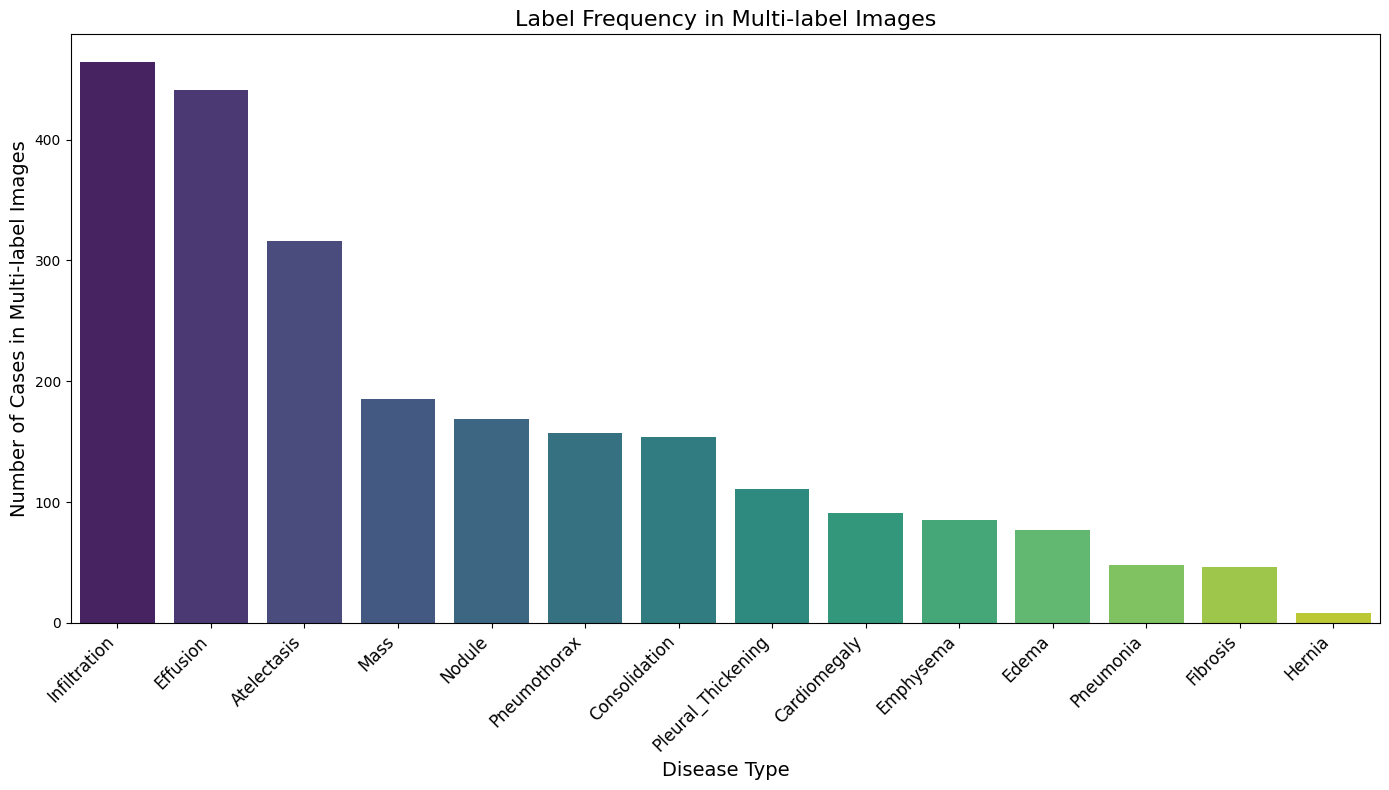

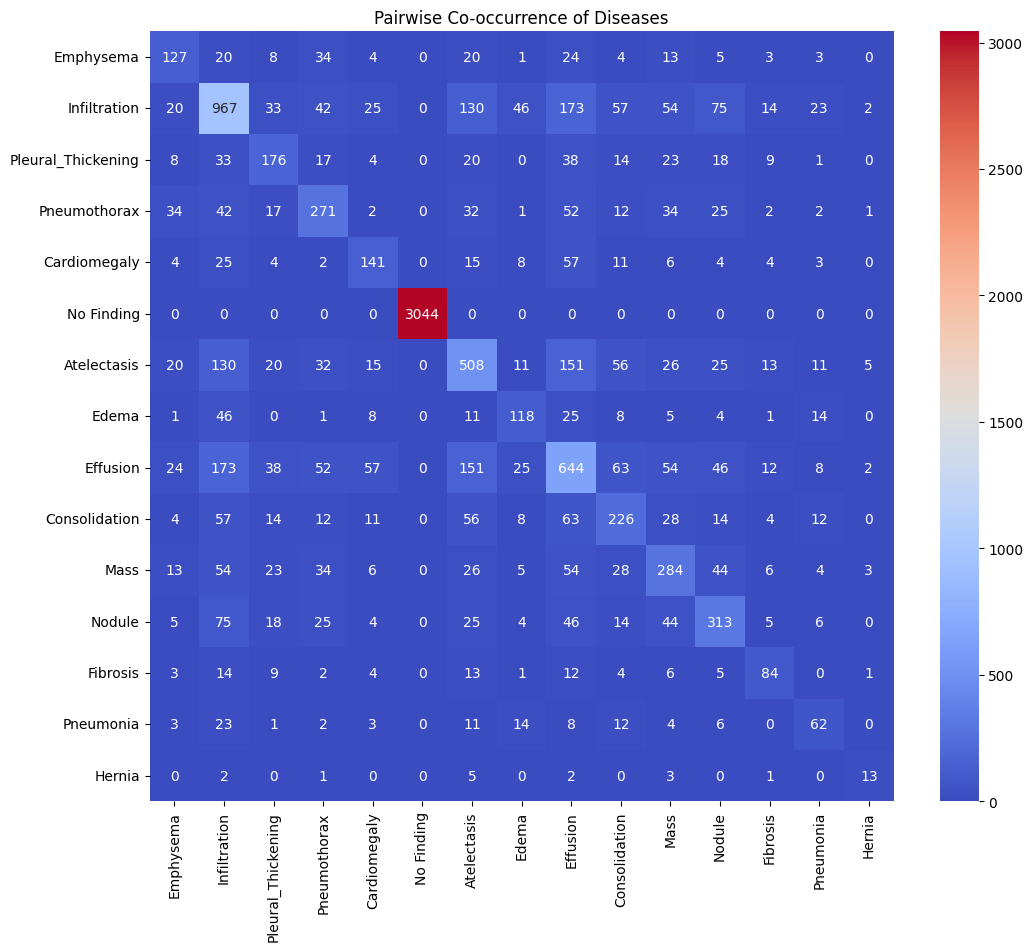

<ipython-input-13-20a64acc16bb>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=num_labels_distribution.index, y=num_labels_distribution.values, palette='rocket')


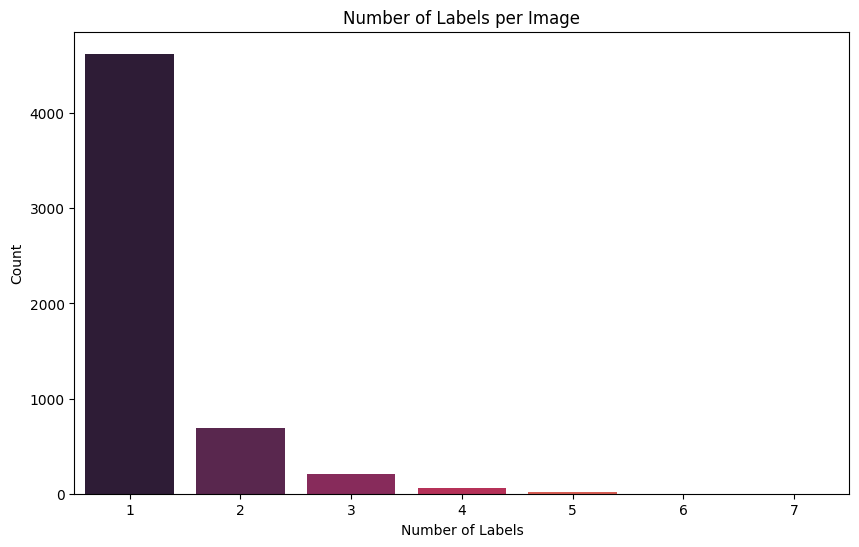

<ipython-input-13-20a64acc16bb>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='magma')


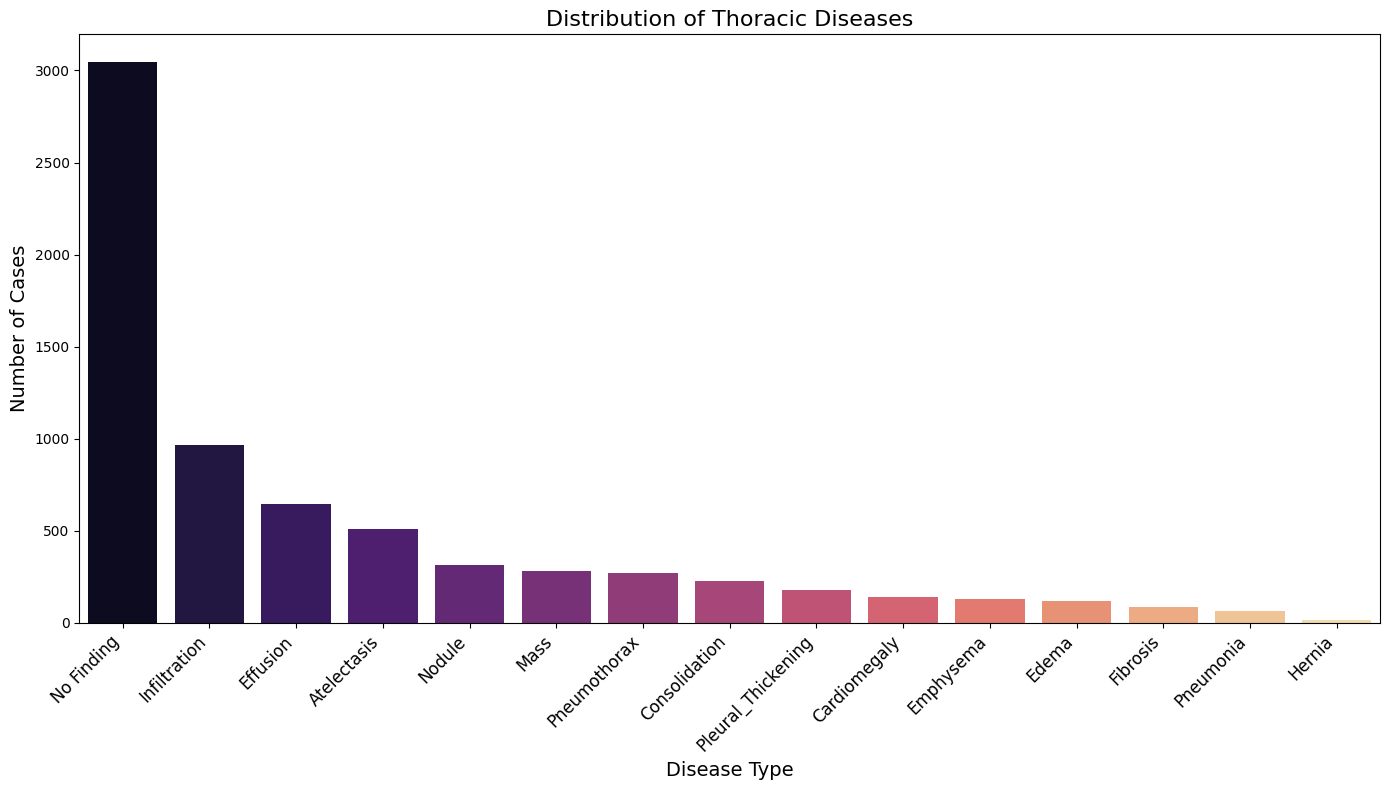

Image Index       0
Finding Labels    0
Num Labels        0
dtype: int64
Number of duplicate images: 0


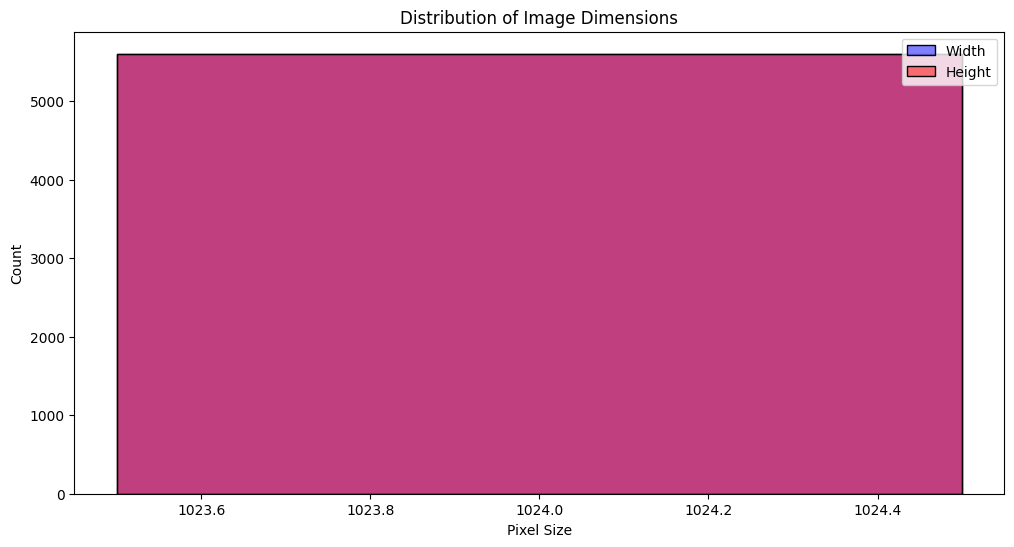

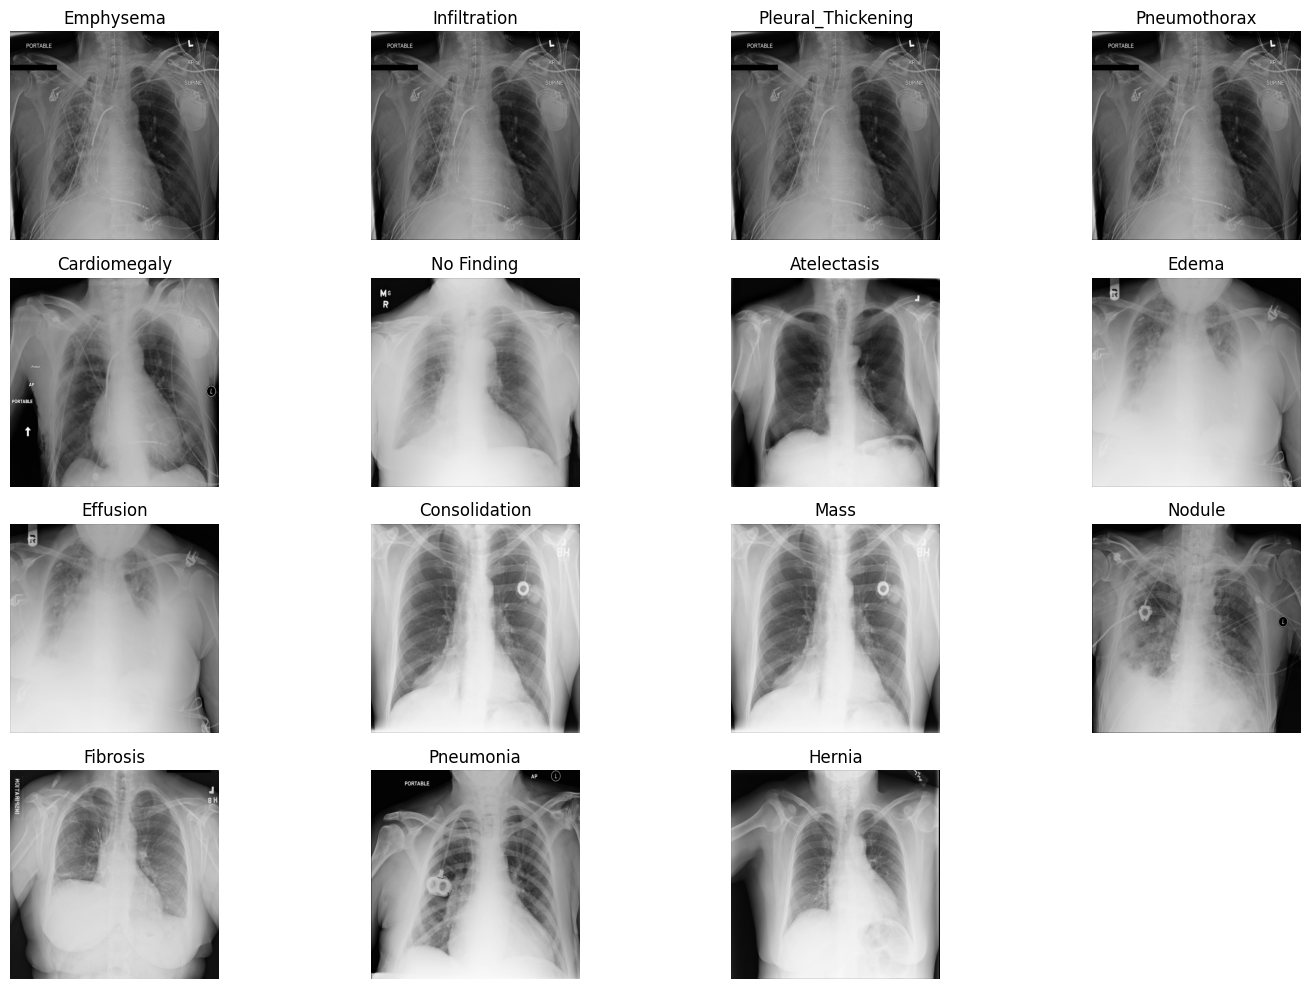

Image Formats:
 PNG    5606
Name: count, dtype: int64
Color Modes:
 L       5583
RGBA      23
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import random

csv_file_path = 'sample_labels.csv'
df = pd.read_csv(csv_file_path)

df = df[['Image Index', 'Finding Labels']]

df['Finding Labels'] = df['Finding Labels'].apply(lambda x: x.split('|'))


all_labels = [label for sublist in df['Finding Labels'] for label in sublist]
label_counts = pd.Series(all_labels).value_counts()

labels = pd.Series([label for sublist in df['Finding Labels'] for label in sublist]).unique()
co_occurrence_matrix = pd.DataFrame(0, index=labels, columns=labels)


multi_label_images = df[df['Finding Labels'].apply(lambda x: len(x) > 1)]
multi_label_counts = [label for sublist in multi_label_images['Finding Labels'] for label in sublist]
multi_label_counts_series = pd.Series(multi_label_counts).value_counts()



plt.figure(figsize=(14, 8))
sns.barplot(x=multi_label_counts_series.index, y=multi_label_counts_series.values, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Label Frequency in Multi-label Images', fontsize=16)
plt.xlabel('Disease Type', fontsize=14)
plt.ylabel('Number of Cases in Multi-label Images', fontsize=14)
plt.tight_layout()
plt.show()

for labels_in_image in df['Finding Labels']:
    for i, label1 in enumerate(labels_in_image):
        for label2 in labels_in_image[i:]:
            co_occurrence_matrix.at[label1, label2] += 1
            if label1 != label2:
                co_occurrence_matrix.at[label2, label1] += 1


plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Pairwise Co-occurrence of Diseases')
plt.show()

df['Num Labels'] = df['Finding Labels'].apply(lambda x: len(x))
num_labels_distribution = df['Num Labels'].value_counts().sort_index()

# Visualization: Number of labels per image
plt.figure(figsize=(10, 6))
sns.barplot(x=num_labels_distribution.index, y=num_labels_distribution.values, palette='rocket')
plt.title('Number of Labels per Image')
plt.xlabel('Number of Labels')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='magma')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Distribution of Thoracic Diseases', fontsize=16)
plt.xlabel('Disease Type', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.tight_layout()
plt.show()


print(df.isnull().sum())
duplicate_images = df[df.duplicated(subset='Image Index')]
print(f"Number of duplicate images: {duplicate_images.shape[0]}")

df = df.drop_duplicates(subset='Image Index')

image_folder_path = 'data/images/'
image_sizes = []

for image_file in os.listdir(image_folder_path):
    img = Image.open(os.path.join(image_folder_path, image_file))
    image_sizes.append(img.size)


size_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

plt.figure(figsize=(12, 6))
sns.histplot(size_df['Width'], color='blue', kde=True, label='Width')
sns.histplot(size_df['Height'], color='red', kde=True, label='Height')
plt.title('Distribution of Image Dimensions')
plt.xlabel('Pixel Size')
plt.legend()
plt.show()

unique_labels = pd.Series([label for sublist in df['Finding Labels'] for label in sublist]).unique()


plt.figure(figsize=(15, 10))
for i, label in enumerate(unique_labels):
    image_row = df[df['Finding Labels'].apply(lambda x: label in x)].iloc[0]
    image_path = os.path.join(image_folder_path, image_row['Image Index'])
    img = Image.open(image_path)
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

image_formats = []
color_modes = []

for image_file in os.listdir(image_folder_path):
    img = Image.open(os.path.join(image_folder_path, image_file))
    image_formats.append(img.format)
    color_modes.append(img.mode)


format_counts = pd.Series(image_formats).value_counts()
color_mode_counts = pd.Series(color_modes).value_counts()

print("Image Formats:\n", format_counts)
print("Color Modes:\n", color_mode_counts)



In [ ]:
# Count the number of images for each class
class_counts = df['Finding Labels'].explode().value_counts()

# Define a threshold for underrepresentation (e.g., less than 100 images)
underrepresented_classes = class_counts[class_counts < 100]
print("Underrepresented Classes:")
print(underrepresented_classes)

Underrepresented Classes:
Finding Labels
Fibrosis     84
Pneumonia    62
Hernia       13
Name: count, dtype: int64


<ipython-input-16-c8b4f202080b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


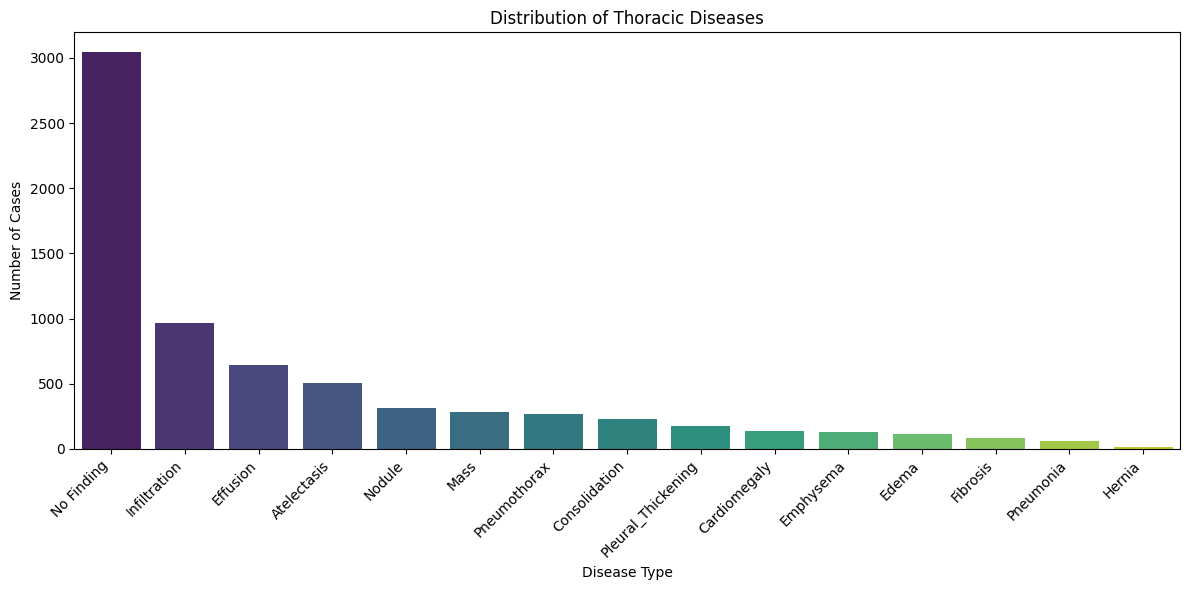

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Thoracic Diseases')
plt.xlabel('Disease Type')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

In [ ]:
def assess_image_quality(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)

    # Calculate mean and standard deviation of pixel values
    mean_pixel_value = img_array.mean()
    std_pixel_value = img_array.std()

    return mean_pixel_value, std_pixel_value

# Assess quality for a sample of images
sample_image_paths = df['Image Index'].sample(10).apply(lambda x: os.path.join(image_folder_path, x))
quality_stats = sample_image_paths.apply(assess_image_quality)
quality_df = pd.DataFrame(quality_stats.tolist(), columns=['Mean', 'Std Dev'])
print(quality_df)


         Mean    Std Dev
0  157.158394  45.354372
1  105.670973  39.662400
2  110.102472  62.814321
3  104.333616  37.198095
4  139.267060  62.646015
5  101.547791  64.048715
6   99.347765  71.931208
7  127.023201  67.804113
8  107.740713  74.151808
9  108.789144  61.368184


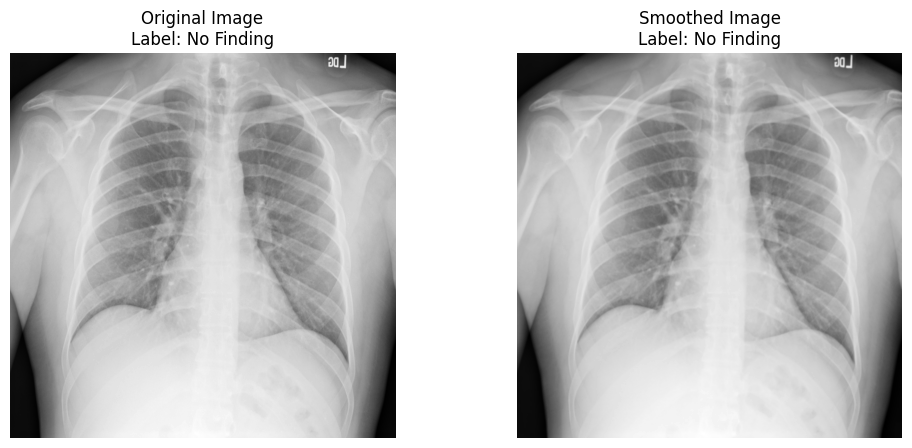

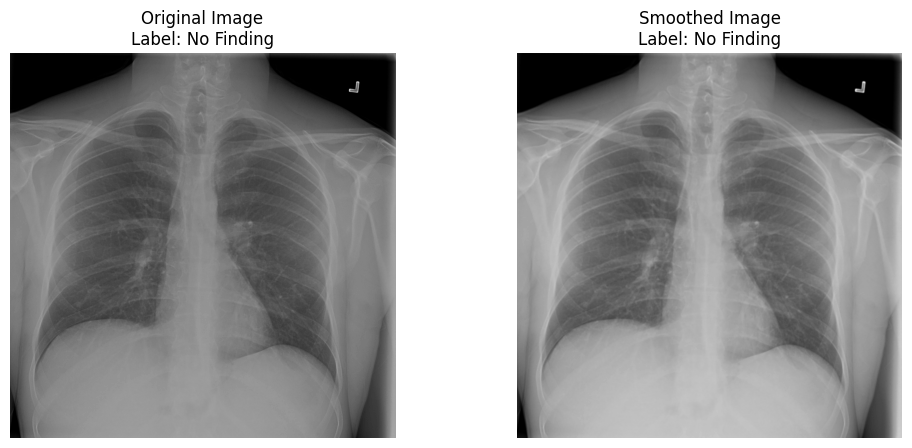

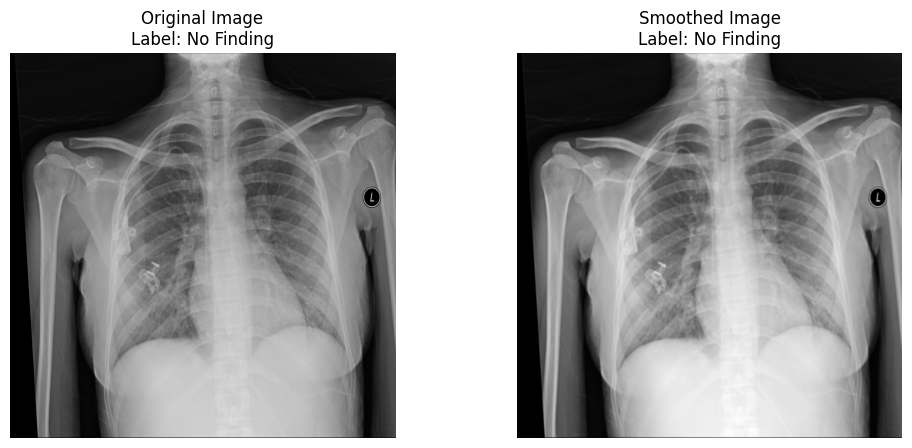

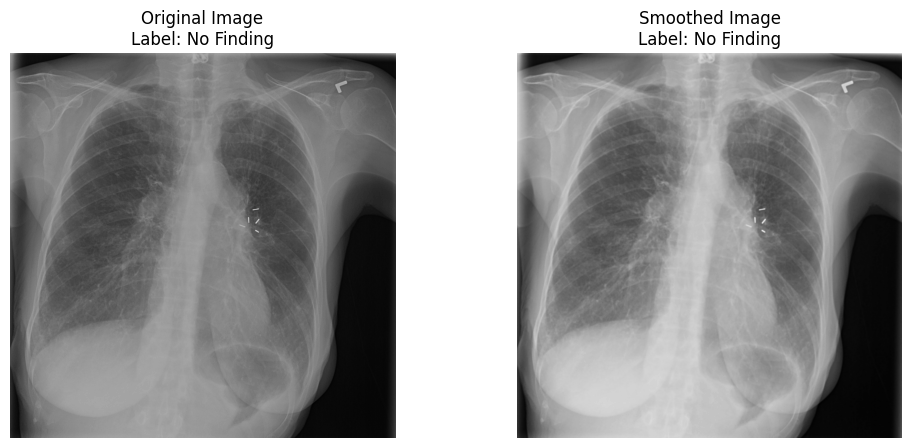

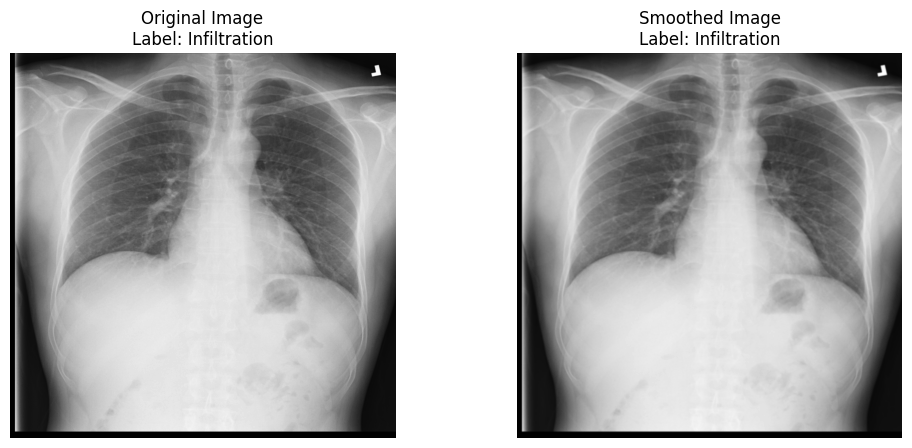

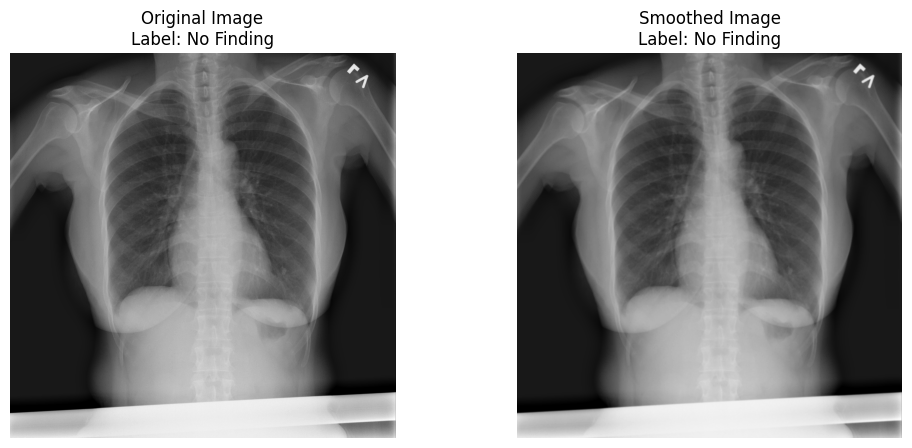

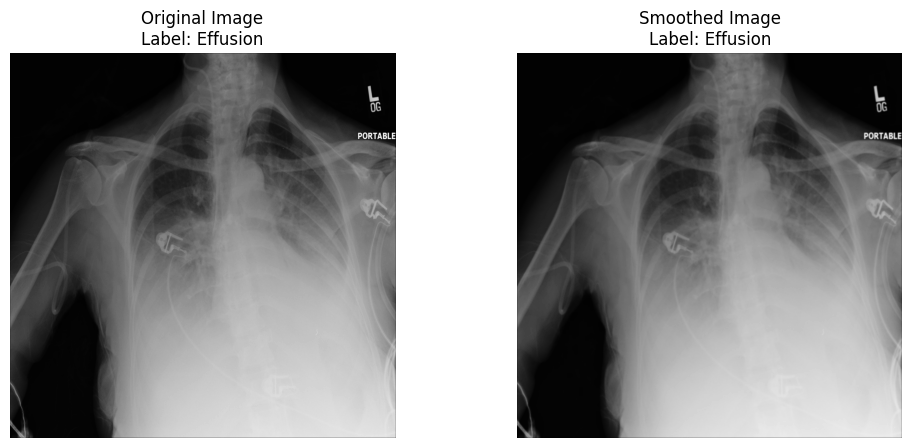

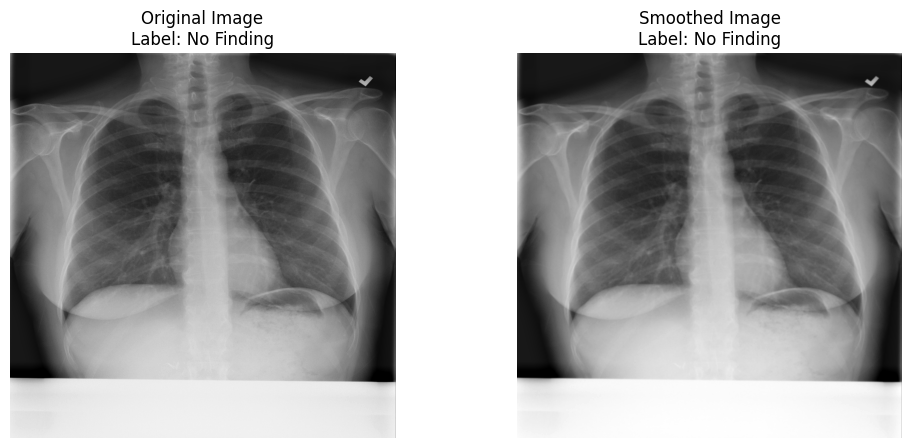

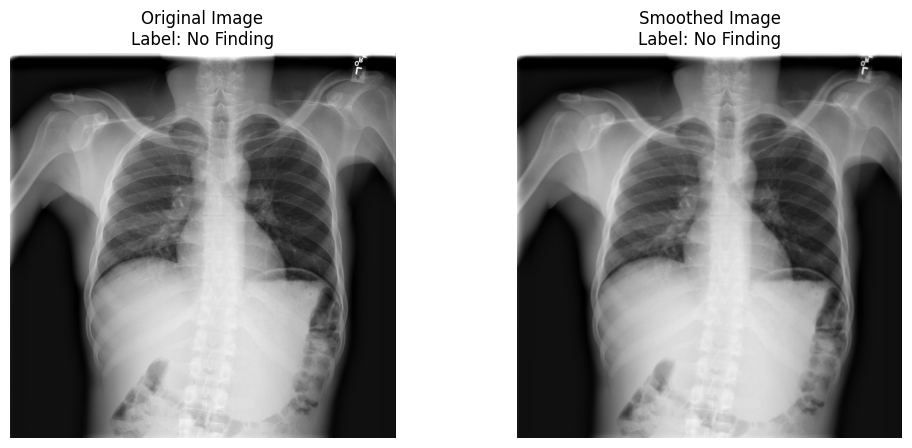

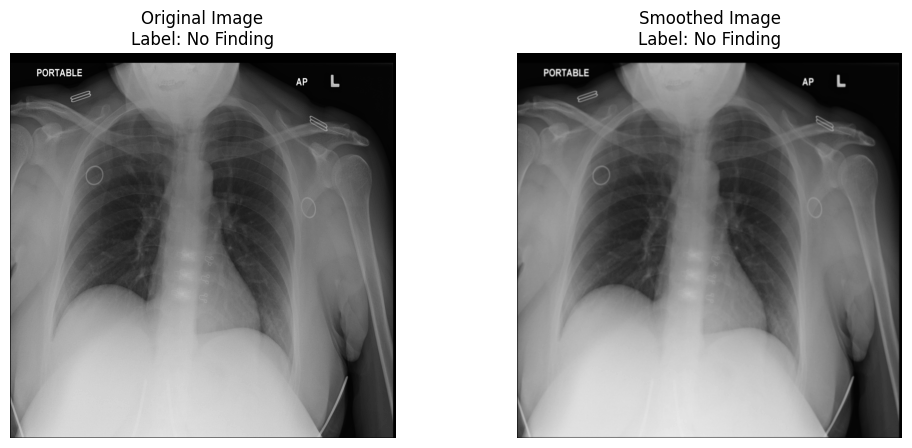

In [ ]:
from scipy.ndimage import gaussian_filter
import numpy as np

def check_for_noise(image_path, label):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_array = np.array(img)

    # Apply Gaussian filter to smooth the image
    smoothed_img = gaussian_filter(img_array, sigma=1)

    # Visualize original and smoothed image with label
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.title(f'Original Image\nLabel: {label}')
    plt.imshow(img_array, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'Smoothed Image\nLabel: {label}')
    plt.imshow(smoothed_img, cmap='gray')
    plt.axis('off')

    plt.show()

# Check for noise in a sample of images with labels
for img_path in sample_image_paths:
    # Get the corresponding label from the DataFrame
    image_index = os.path.basename(img_path)  # Get the image file name
    label = df[df['Image Index'] == image_index]['Finding Labels'].values[0]  # Get the label(s)
    check_for_noise(img_path, ", ".join(label))  # Pass label(s) as a string

In [ ]:
import pandas as pd

# Load your dataset (assuming it's already in a DataFrame called df)
# df = pd.read_csv('your_dataset.csv')  # Uncomment if you need to load the dataset again

# Check for null values in the Finding Labels column
null_labels = df['Finding Labels'].isnull().sum()
print(f"Number of null labels in Finding Labels: {null_labels}")

# If you want to check for null values in the entire DataFrame
null_summary = df.isnull().sum()
print("Summary of null values in the dataset:")
print(null_summary)

# Optionally, if you want to display rows with null labels
rows_with_null_labels = df[df['Finding Labels'].isnull()]
print("Rows with null labels in Finding Labels:")
print(rows_with_null_labels)

Number of null labels in Finding Labels: 0
Summary of null values in the dataset:
Image Index       0
Finding Labels    0
Num Labels        0
dtype: int64
Rows with null labels in Finding Labels:
Empty DataFrame
Columns: [Image Index, Finding Labels, Num Labels]
Index: []
